# COE 347: Homework 2

**Author: Jiwoong "Alex" Choi**

## Objectives

The objective of this homework is to explore the application of numerical methods for the solution of ODEs with emphasis on accuracy of a numerical solution. We will consider all methods seen and discussed in class.
## Question 1
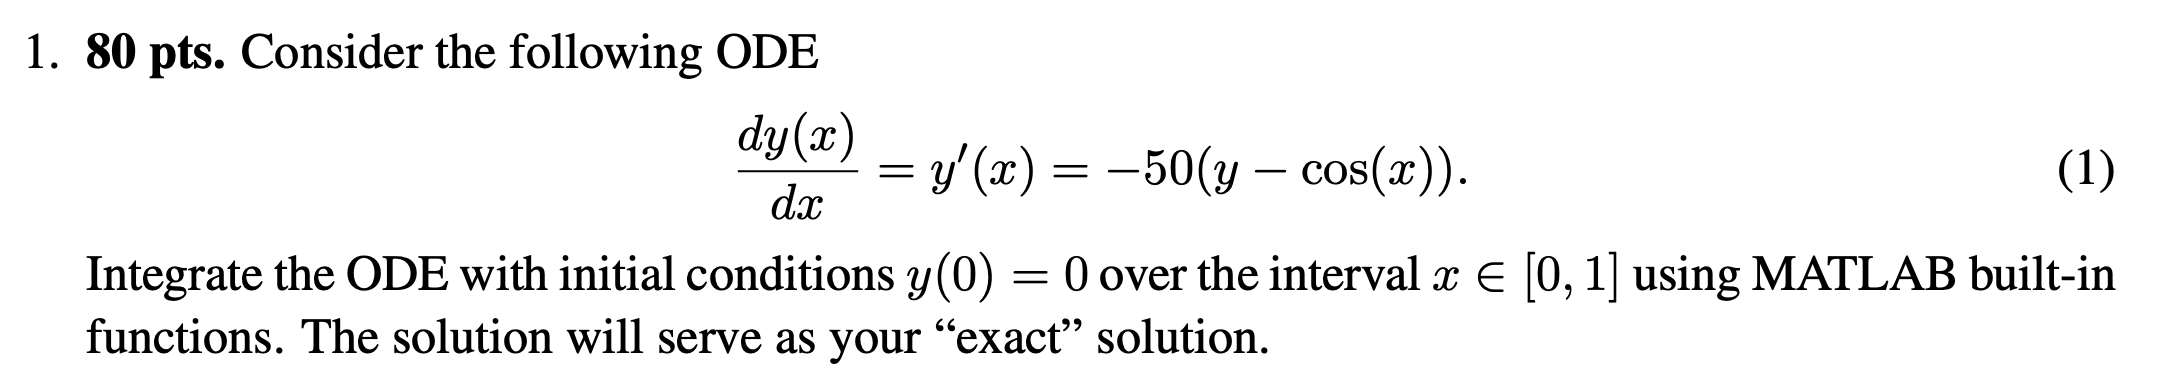

### Setting up our ODE

In [124]:
# load in the modules first
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pprint import pprint


# we will use scipy.integrate.solve_ivp() to solve our IVP listed above
def ode(x, y): # first define a function
    return -50 * (y - np.cos(x))

#### Explicit Euler Method
Here we implement Forward Euler or Explicit Euler method to solve the ODE above.


In [125]:
def fwd_euler(f, t_range, y0, N):
    """
    Implements the Forward Euler method for solving ODEs.

    Parameters:
        f: Function defining the ODE, dy/dt = f(t, y)
        t_span: Tuple of (t_start, t_end)
        y0: Initial condition, scalar or array
        N: number of steps

    Returns:
        t_values: Array of time values
        y_values: Array of solution values at each time
        func_eval: number of time the ODE is called
    """
    func_eval = 0

    t_start, t_end = t_range # start and end time
    h = (t_end- t_start) / N # time step size
    
    t_values = np.linspace(t_start, t_end, num = N+1) # generates num points including the start and end points. To divide an interval into 𝑁N steps, you need 𝑁+1 points
    y_values = np.zeros(len(t_values)) # intilize solution values of y(x)
    
    y_values[0] = y0 # initaizlie initial condition y0
    
    for n, time in enumerate(t_values[:-1]): # go through all time evaluation points
        y_values[n+1] = y_values[n] + h * f(time, y_values[n]) # recall the euler formula: y_n+1 = y_n + h * f(t_n, y_n)
        func_eval += 1

    # finally return t and y values
    return t_values, y_values, func_eval

#### Implicit (or Backward) Euler Method
Here we implement Backward Euler or Implicit Euler method to solve the ODE above. <br>
One key challenge with **implicit Euler Method** is that, well, it's **implicit**. Meaning, both LHS and RHS has the unknown, $y_{n+1}$, that we are trying to solve for. <br>
But for our specific ODE, because it's *linear*, we can manipulate our original equation to concentrate our unknown to the LHS.

Recall the Backward Euler formula:
$$
y_{n+1} = y_n + h \cdot f(t_{n+1}, y_{n+1})
$$

For the specific ODE:

$$
\frac{dy}{dt} = -50(y - \cos t)
$$

Substituting into the Backward Euler formula:

$$
y_{n+1} = y_n + h \cdot (-50(y_{n+1} - \cos t_{n+1}))
$$

Rearrange:

$$
y_{n+1} + 50h y_{n+1} = y_n + 50h \cos t_{n+1}
$$

Factor $y_{n+1}$:

$$
y_{n+1} (1 + 50h) = y_n + 50h \cos t_{n+1}
$$

Solve explicitly:

$$
y_{n+1} = \frac{y_n + 50h \cos t_{n+1}}{1 + 50h}
$$

We will go ahead and use this explicit form of our ODE.

In [126]:
def bwd_euler(f, t_range, y0, N):
    """
    Implements the Backward Euler method for solving ODEs when an explicit formula is available.

    Parameters:
        f: Function defining the ODE, dy/dt = f(t, y)
        t_range: Tuple of (t_start, t_end)
        y0: Initial condition, scalar or array
        N: Number of steps

    Returns:
        t_values: Array of time values
        y_values: Array of solution values at each time
    """
    func_eval = 0
    t_start, t_end = t_range  # Start and end time
    h = (t_end - t_start) / N  # Time step size

    t_values = np.linspace(t_start, t_end, num=N + 1)  # Generate N+1 points
    y_values = np.zeros(len(t_values))  # Initialize solution array

    y_values[0] = y0  # Set initial condition

    # Backward Euler loop
    for n in range(N):  # Iterating from 0 to N-1 (N steps)
        y_values[n+1] = (y_values[n] + 50 * h * np.cos(t_values[n+1])) / (1 + 50 * h)
        func_eval += 1

    return t_values, y_values, func_eval

#### Trapezoidal Method
Here we implement trapezoidal method to approximate our integral for our ODE solution approximation.<br>
However, just like BWD Euler, this is an implicit. Thus, we have to turn this into explicit form if possible.

Start with the trapezoidal method formula:

$$
y_{n+1} = y_n + \frac{h}{2} \left[ f(t_n, y_n) + f(t_{n+1}, y_{n+1}) \right].
$$

Our ODE is:

$$
\frac{dy}{dx} = -50(y - \cos(t)),
$$

substitute $f(t, y) = -50(y - \cos(t))$:

$$
y_{n+1} = y_n + \frac{h}{2} \left[ -50(y_n - \cos(t_n)) + -50(y_{n+1} - \cos(t_{n+1})) \right].
$$

Simplify:

$$
y_{n+1} = y_n - \frac{50h}{2} \left[ (y_n - \cos(t_n)) + (y_{n+1} - \cos(t_{n+1})) \right].
$$

Distribute:

$$
y_{n+1} = y_n - 25h \left[ y_n - \cos(t_n) + y_{n+1} - \cos(t_{n+1}) \right].
$$

Rearrange to collect $y_{n+1}$ terms:

$$
y_{n+1} + 25h y_{n+1} = y_n (1 - 25h) + 25h \left( \cos(t_n) + \cos(t_{n+1}) \right).
$$

Factor $y_{n+1}$ on the left:

$$
y_{n+1}(1 + 25h) = y_n (1 - 25h) + 25h \left( \cos(t_n) + \cos(t_{n+1}) \right).
$$

Solve for $y_{n+1}$:

$$
y_{n+1} = \frac{y_n (1 - 25h) + 25h \left( \cos(t_n) + \cos(t_{n+1}) \right)}{1 + 25h}.
$$


In [127]:
def trapezoidal(f, t_range, y0, N):

    """
    Implements the Trapezoidal method for solving ODEs when an explicit formula is available.

    Parameters:
        f: Function defining the ODE, dy/dt = f(t, y)
        t_range: Tuple of (t_start, t_end)
        y0: Initial condition, scalar or array
        N: Number of steps

    Returns:
        t_values: Array of time values
        y_values: Array of solution values at each time
    """
    func_eval = 0
    t_start, t_end = t_range  # Start and end time
    h = (t_end - t_start) / N  # Time step size

    t_values = np.linspace(t_start, t_end, num=N + 1)  # Generate N+1 points
    y_values = np.zeros(len(t_values))  # Initialize solution array

    y_values[0] = y0  # Set initial condition

    for n, t in enumerate(t_values[0:-1]):
        y_values[n+1] = y_values[n] * (1 - 25 * h) + 25 * h * (np.cos(t) + np.cos(t_values[n+1])) # compute the numerator first
        y_values[n+1] /= 1 + 25 * h # then divide by the denominator's value
        func_eval += 1
    
    return t_values, y_values, func_eval



#### Implicit Midpoint Method
Here we implement the implicit midpoint method to apporximate our solution to ODE.
Again, because this is an implicit method, we have to rearrange our equation to an explicit form if allowed.
We start with the midpoint method formula:

$$
y_{n+1} = y_n + h f\left(t_{n+\frac{1}{2}}, y_{n+\frac{1}{2}}\right),
$$

where:
$$
t_{n+\frac{1}{2}} = t_n + \frac{h}{2}, \quad y_{n+\frac{1}{2}} = \frac{y_n + y_{n+1}}{2}.
$$

For the given ODE:
$$
\frac{dy}{dx} = -50(y - \cos(t)),
$$

we substitute $f(t, y) = -50(y - \cos(t))$ into the midpoint method:

$$
y_{n+1} = y_n + h \cdot \left(-50 \left(y_{n+\frac{1}{2}} - \cos(t_{n+\frac{1}{2}})\right)\right).
$$

Substituting $y_{n+\frac{1}{2}} = \frac{y_n + y_{n+1}}{2}$, we get:

$$
y_{n+1} = y_n - 50h \left(\frac{y_n + y_{n+1}}{2} - \cos\left(t_n + \frac{h}{2}\right)\right).
$$

Simplify to Solve for $y_{n+1}$:

$$
y_{n+1} = y_n - \frac{50h}{2} \cdot \left(y_n + y_{n+1}\right) + 50h \cdot \cos\left(t_n + \frac{h}{2}\right).
$$

$$
y_{n+1} + \frac{50h}{2} y_{n+1} = y_n - \frac{50h}{2} y_n + 50h \cdot \cos\left(t_n + \frac{h}{2}\right).
$$

$$
y_{n+1} \left(1 + \frac{50h}{2}\right) = y_n \left(1 - \frac{50h}{2}\right) + 50h \cdot \cos\left(t_n + \frac{h}{2}\right).
$$

$$
y_{n+1} = \frac{y_n \left(1 - \frac{50h}{2}\right) + 50h \cdot \cos\left(t_n + \frac{h}{2}\right)}{1 + \frac{50h}{2}}.
$$


The final explicit formula for $y_{n+1}$ is:

$$
y_{n+1} = \frac{y_n \left(1 - 25h\right) + 50h \cos\left(t_n + \frac{h}{2}\right)}{1 + 25h}.
$$


In [128]:
def mid_point(f, t_range, y0, N):
    """
    Implements the Implicit Midpoint method for solving ODEs when an explicit formula is available.

    Parameters:
        f: Function defining the ODE, dy/dt = f(t, y)
        t_range: Tuple of (t_start, t_end)
        y0: Initial condition, scalar or array
        N: Number of steps

    Returns:
        t_values: Array of time values
        y_values: Array of solution values at each time
    """
    func_eval = 0
    t_start, t_end = t_range  # Start and end time
    h = (t_end - t_start) / N  # Time step size

    t_values = np.linspace(t_start, t_end, num=N + 1)  # Generate N+1 points
    y_values = np.zeros(len(t_values))  # Initialize solution array

    y_values[0] = y0  # Set initial condition

    for n, t in enumerate(t_values[0:-1]):
        y_values[n+1] = y_values[n] * (1 - 25 * h) + 50 * h * np.cos(t + 0.5 * h) # compute the numerator first
        y_values[n+1] /= 1 + 25 * h # then divide by the denominator's value
        func_eval += 1
    
    return t_values, y_values, func_eval

#### Adams-Bashforth 2 (AB2) Method
The second-order Adams-Bashforth (AB2) method is given by:

$$
y_{n+1} = y_n + h \left( \frac{3}{2} f_n - \frac{1}{2} f_{n-1} \right),
$$

where:
- $f_n = f(t_n, y_n)$ is the function evaluated at the current time step $t_n$,
- $f_{n-1} = f(t_{n-1}, y_{n-1})$ is the function evaluated at the previous time step $t_{n-1}$,
- $h$ is the time step size.

The global error is of order $\mathcal{O}(h^2)$.

In [129]:
def multi_AB2(f, t_range, y0, N):
    """
    Implements the explicit Adams-Bashforth 2 method for solving ODE.

    Parameters:
        f: Function defining the ODE, dy/dt = f(t, y)
        t_range: Tuple of (t_start, t_end)
        y0: Initial condition, scalar or array
        N: Number of steps

    Returns:
        t_values: Array of time values
        y_values: Array of solution values at each time
    """
    func_eval = 0
    t_start, t_end = t_range  # Start and end time
    h = (t_end - t_start) / N  # Time step size

    t_values = np.linspace(t_start, t_end, num=N + 1)  # Generate N+1 points
    y_values = np.zeros(len(t_values))  # Initialize solution array

    y_values[0] = y0  # Set initial condition

    # Iteratively compute first 5 steps using RK2
    for n in range(0, 4):  # Iterate from n=0 to n=3, calculating 5 steps
        t = t_values[n]  # Current time
        t2 = t + 0.5 * h  # Midpoint in time
        y2 = y_values[n] + 0.5 * h * f(t, y_values[n])  # Intermediate y

        # Update y_n+1 using t2 and y2
        y_values[n+1] = y_values[n] + h * f(t2, y2)

        func_eval += 2  # RK2 uses 2 function evaluations

    # Apply AB2 for next steps
    for n in range(4, len(t_values) - 1):  # Start at n=4
        y_values[n+1] = y_values[n] + h * (1.5 * f(t_values[n], y_values[n]) - 0.5 * f(t_values[n-1], y_values[n-1]))
        func_eval += 2  # Two evaluations per step (current and previous)

    return t_values, y_values, func_eval


#### Explicit Runge-Kutta 2 (RK2) Method
The explicit RK2 (midpoint method) is defined as follows:

1. Compute the midpoint in time:
$$
t_2 = t_n + \frac{h}{2}.
$$

2. Compute the intermediate value $y_2$:
$$
y_2 = y_n + \frac{h}{2} f(t_n, y_n).
$$

3. Update $y_{n+1}$ using $t_2$ and $y_2$:
$$
y_{n+1} = y_n + h f(t_2, y_2).
$$

The RK2 method involves two stages:
- First, calculating $y_2$, the intermediate solution at $t_2$.
- Then, using $y_2$ to compute $y_{n+1}$ via the midpoint method.

The global error for RK2 is of order:
$$
E = \mathcal{O}(h^2).
$$



In [130]:
def explicit_RK2(f, t_range, y0, N):
    """
    Implements the explicit Runge-Kutta 2 method (Midpoint Method) for solving the ODE.

    Parameters:
        f: Function defining the ODE, dy/dt = f(t, y)
        t_range: Tuple of (t_start, t_end)
        y0: Initial condition, scalar or array
        N: Number of steps

    Returns:
        t_values: Array of time values
        y_values: Array of solution values at each time
    """
    func_eval = 0
    # Start and end time
    t_start, t_end = t_range
    h = (t_end - t_start) / N  # Time step size

    # Generate time values and initialize solution array
    t_values = np.linspace(t_start, t_end, num=N + 1)
    y_values = np.zeros((N + 1, ) + np.shape(y0))  # Properly handle scalar/vector y0

    # Set initial condition
    y_values[0] = y0

    # Iteratively compute y_n+1 using RK2
    for n in range(N):  # Iterate up to N steps
        t = t_values[n]  # Current time
        # Compute intermediate values t2 and y2
        t2 = t + 0.5 * h  # Midpoint in time
        y2 = y_values[n] + 0.5 * h * f(t, y_values[n])  # Intermediate y

        # Update y_n+1 using t2 and y2
        y_values[n+1] = y_values[n] + h * f(t2, y2)

        func_eval +=2

    return t_values, y_values, func_eval

#### Explicit Runge-Kutta 4 (RK4) Method
Here we implement explicit RRunge Kutta, 4th order (RK4) method to solve our ODE.
The Runge-Kutta (RK4) method is defined as:

$$
k_1 = f(x_n, y_n),
$$

$$
k_2 = f\left(x_n + \frac{h}{2}, y_n + \frac{h}{2} k_1\right),
$$

$$
k_3 = f\left(x_n + \frac{h}{2}, y_n + \frac{h}{2} k_2\right),
$$

$$
k_4 = f\left(x_n + h, y_n + h k_3\right),
$$

$$
y_{n+1} = y_n + h \left[\frac{1}{6} k_1 + \frac{2}{6} k_2 + \frac{2}{6} k_3 + \frac{1}{6} k_4\right].
$$


In [131]:
def explicit_RK4(f, t_range, y0, N):
    """
    Implements the explicit Runge-Kutta 4 method for solving the ODE.

    Parameters:
        f: Function defining the ODE, dy/dt = f(t, y)
        t_range: Tuple of (t_start, t_end)
        y0: Initial condition, scalar or array
        N: Number of steps

    Returns:
        t_values: Array of time values
        y_values: Array of solution values at each time
    """
    func_eval = 0
    t_start, t_end = t_range  # Start and end time
    h = (t_end - t_start) / N  # Time step size

    t_values = np.linspace(t_start, t_end, num=N + 1)  # Generate N+1 points
    y_values = np.zeros((N + 1, ) + np.shape(y0))  # Properly handle scalar/vector y0

    y_values[0] = y0  # Set initial condition

    for n in range(N):  # Iterate up to N steps
        t = t_values[n]  # Current time
        k1 = f(t, y_values[n])
        k2 = f(t + 0.5 * h, y_values[n] + 0.5 * h * k1)
        k3 = f(t + 0.5 * h, y_values[n] + 0.5 * h * k2)
        k4 = f(t + h, y_values[n] + h * k3)

        # RK4 update step
        y_values[n+1] = y_values[n] + h * (k1 / 6 + k2 / 3 + k3 / 3 + k4 / 6)

        func_eval += 4

    return t_values, y_values, func_eval

### Plotting Exact Solution Versus Different Numerical Solutions
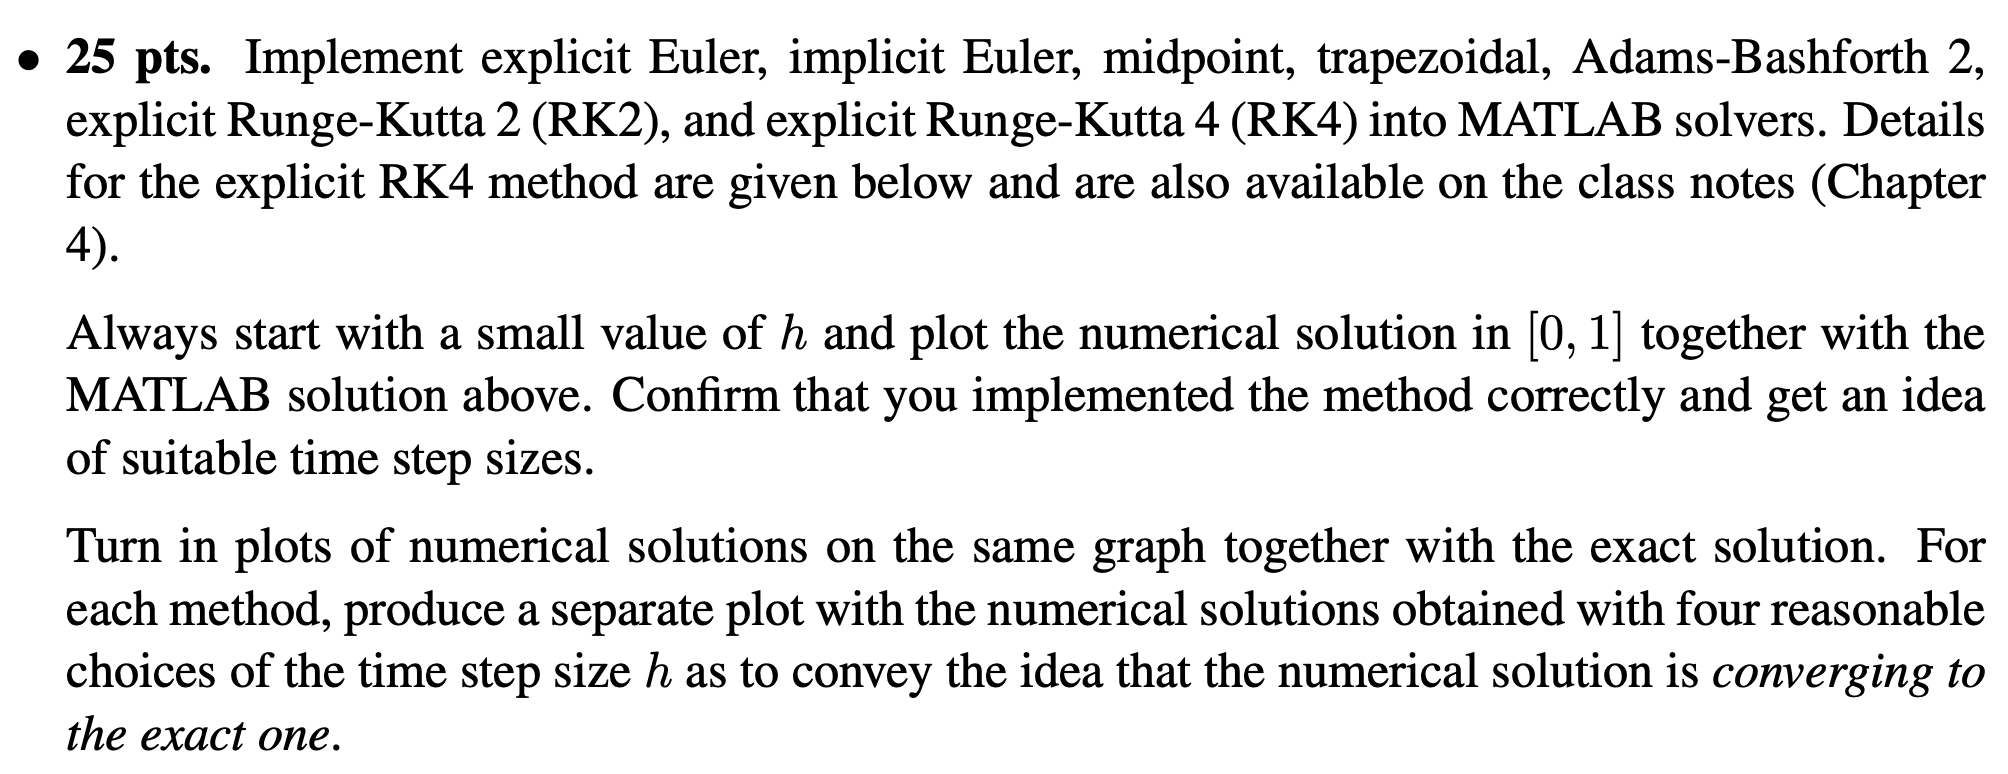

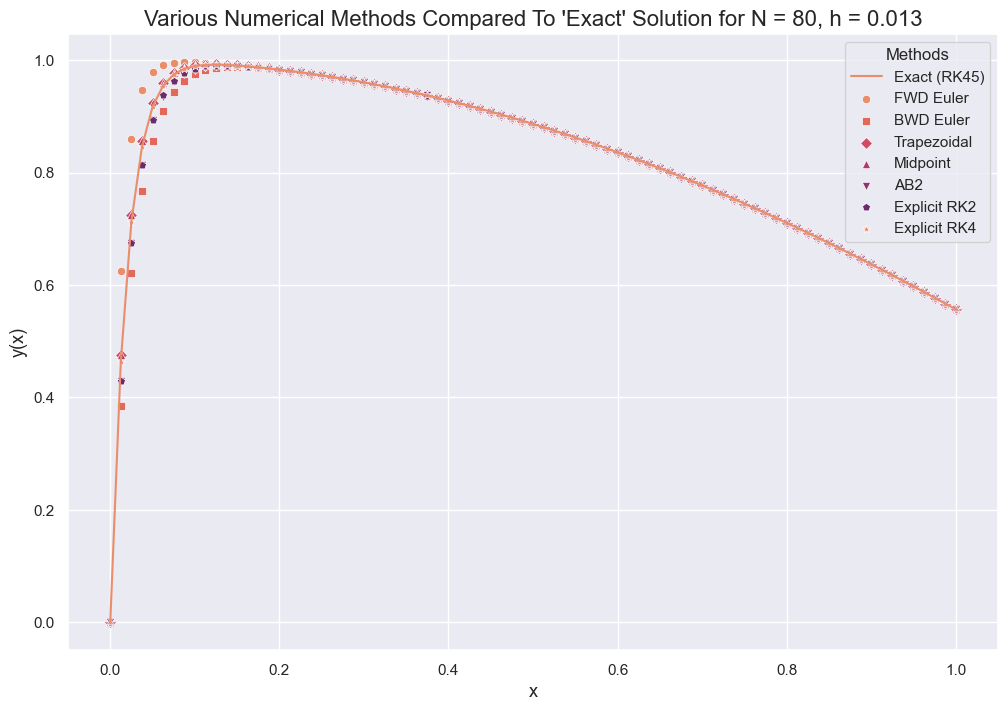

In [132]:
sns.set_theme(palette='flare', style="darkgrid")
# our time span
t_range = [0,1]
t_start, t_end = t_range
# set N
N = 80
# set h
h = (t_end - t_start) / N
# define evaluation points to be consistent.
eval_times = np.linspace(t_start, t_end, num = N+1)
# initial condition
y0 = 0

# solve ode using RK45 -> this is our "exact" solution
exact_y_values = solve_ivp(fun = ode, t_span=[0, 1], y0 =[0], method = 'RK45', t_eval=eval_times,atol=1e-12, rtol=1e-12).y[0]

# Set up the figure size
plt.figure(figsize=(12, 8))  # Width: 12 inches, Height: 8 inches
# Define distinct markers for each method
markers = ["o", "s", "D", "^", "v", "p", "*"]  # Circle, square, diamond, triangle, inverted triangle, pentagon, star

# plot exact solution
sns.lineplot(x=eval_times, y=exact_y_values, label = 'Exact (RK45)')
# Plot Forward Euler
_, fwd_euler_y, _ = fwd_euler(ode, t_range, y0, N)
sns.scatterplot(x=eval_times, y=fwd_euler_y, label='FWD Euler', marker=markers[0])
# Plot Backward Euler
_, bwd_euler_y, _ = bwd_euler(ode, t_range, y0, N)
sns.scatterplot(x=eval_times, y=bwd_euler_y, label='BWD Euler', marker=markers[1])
# Plot Trapezoidal
_, trapz_y, _ = trapezoidal(ode, t_range, y0, N)
sns.scatterplot(x=eval_times, y=trapz_y, label='Trapezoidal', marker=markers[2])
# Plot Midpoint
_, midpoint_y, _ = mid_point(ode, t_range, y0, N)
sns.scatterplot(x=eval_times, y=midpoint_y, label='Midpoint', marker=markers[3])
# Plot AB2
_, AB2_y, _ = multi_AB2(ode, t_range, y0, N)
sns.scatterplot(x=eval_times, y=AB2_y, label="AB2", marker=markers[4])
# Plot Explicit RK2
_, RK2_y, _ = explicit_RK2(ode, t_range, y0, N)
sns.scatterplot(x=eval_times, y=RK2_y, label='Explicit RK2', marker=markers[5])
# Plot Explicit RK4
_, RK4_y, _ = explicit_RK4(ode, t_range, y0, N)
sns.scatterplot(x=eval_times, y=RK4_y, label='Explicit RK4', marker=markers[6])

axes_font_size = 13
plt.xlabel("x", fontsize = axes_font_size)
plt.ylabel("y(x)", fontsize = axes_font_size)
plt.title(f"Various Numerical Methods Compared To 'Exact' Solution for N = {N}, h = {h:.3f}", fontsize = 16)
plt.legend(title="Methods")
plt.show()

### Varying Step-Sizes for Each Numerical Method for Convergence Confirmation
Here, we make separate plots with the numerical solutions obtained with four reasonable choices of the time step size h as to convey the idea that the numerical solution is converging to the exact one. As our plots confirm below, they all converge with reasonable enough N

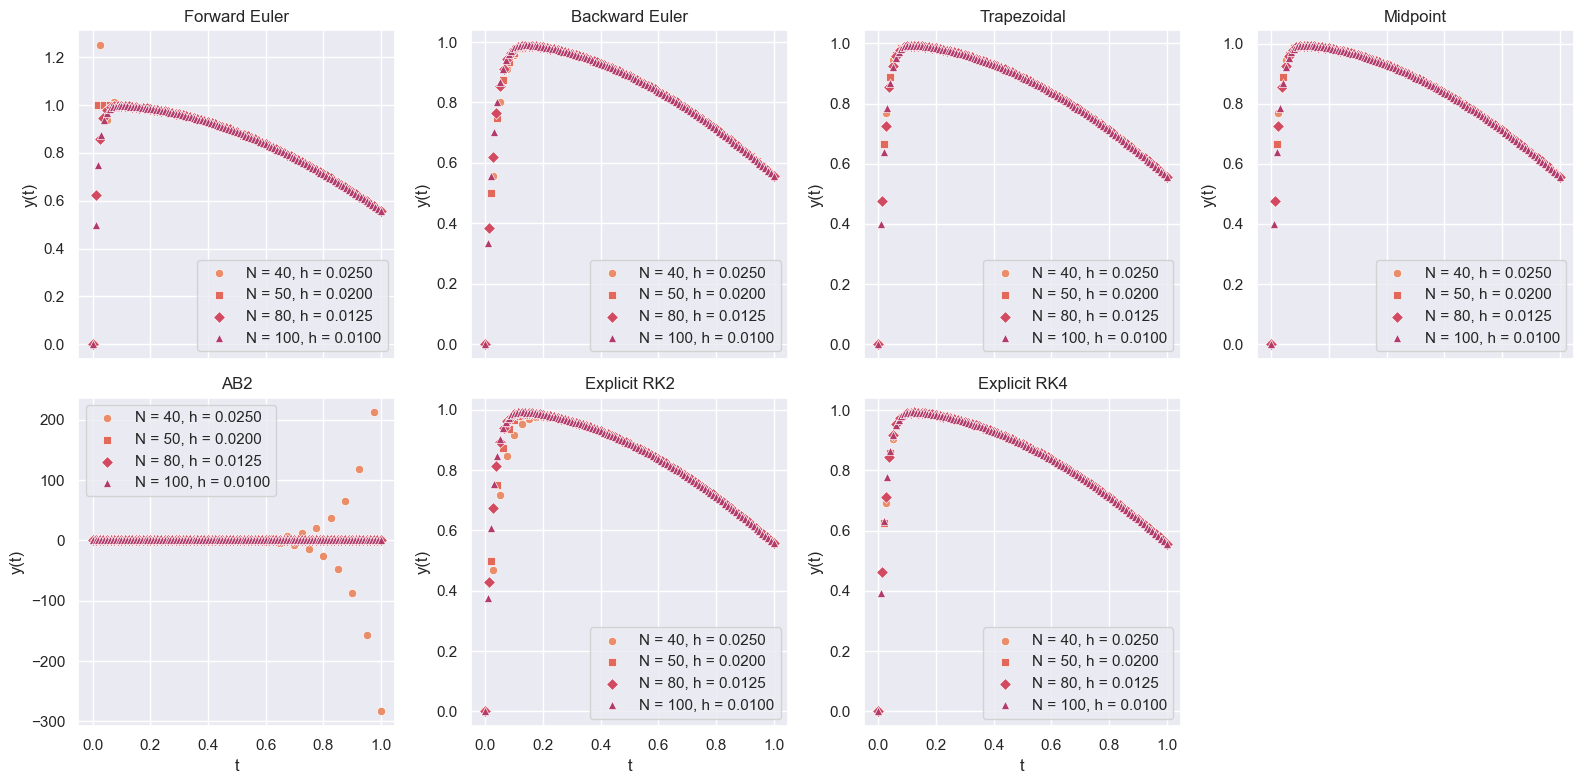

In [133]:
# Define the figure and axes for a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharex=True)  # 2 rows, 4 columns
# Titles for each subplot
titles = ["Forward Euler", "Backward Euler", "Trapezoidal", "Midpoint","AB2", "Explicit RK2", "Explicit RK4"]
# Methods and their corresponding function calls
methods = [fwd_euler, bwd_euler, trapezoidal, mid_point, multi_AB2, explicit_RK2, explicit_RK4]
# different step numbers
varying_Ns = np.array([40, 50, 80, 100])
# different step sizes
varying_hs = (t_end - t_start) / varying_Ns
# Define distinct markers for different step sizes
step_size_markers = ["o", "s", "D", "^"]  # At least 4 unique markers

# for later use, we'll also store global error values for varying step sizes for each method
methods_errors = np.zeros(shape = (7,4)) # 7 numerical methods, 4 varying hs for each method
# for method_work computation for later use
methods_work = np.zeros(shape = (7,4), dtype=int)

# Loop over each subplot (2x4 grid)
for i, ax in enumerate(axes.flat[0:-1]):  # Flatten axes for easy iteration
    # store  the errors, e(h) w.r.t. step size h, the difference between the CURRENT numerical solution and the “exact” solution.
    curr_mthd_error = np.zeros(4) # 4 errors for 4 different h
    # store the amount of ode invocatios we have
    curr_mthd_work = np.zeros(4, dtype=int) # 4 diff values for 4 diff. h
    # loop over different time step sizes
    for j, steps in enumerate(varying_Ns):
        t_values, y_values, ode_invokes = methods[i](ode, t_range, y0, steps)  # Compute solution using a numerical method
        sns.scatterplot(x=t_values, y=y_values, ax=ax, marker=step_size_markers[j], label=f"N = {steps}, h = {varying_hs[j]:.4f}") # pot using different step sizes
        # solve ode using RK45 -> this is our "exact" solution
        exact_y = solve_ivp(fun=ode, t_span=t_range, y0=[y0], method='RK45', t_eval=[t_end], atol=1e-12, rtol=1e-12).y[0, -1]
        # compute the error for current h, at x = 1.0
        curr_mthd_error[j] = abs(y_values[-1] - exact_y)
        # store the function invocation
        curr_mthd_work[j] = ode_invokes
    
    methods_errors[i] = curr_mthd_error # store 4 errors into our global error vector
    methods_work[i] = curr_mthd_work

    ax.set_title(titles[i])  # Set title
    ax.set_xlabel("t")
    ax.set_ylabel("y(t)")
    ax.legend()  # Add legend to each subplot

# hide the last plot
axes[-1,-1].axis('off')
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

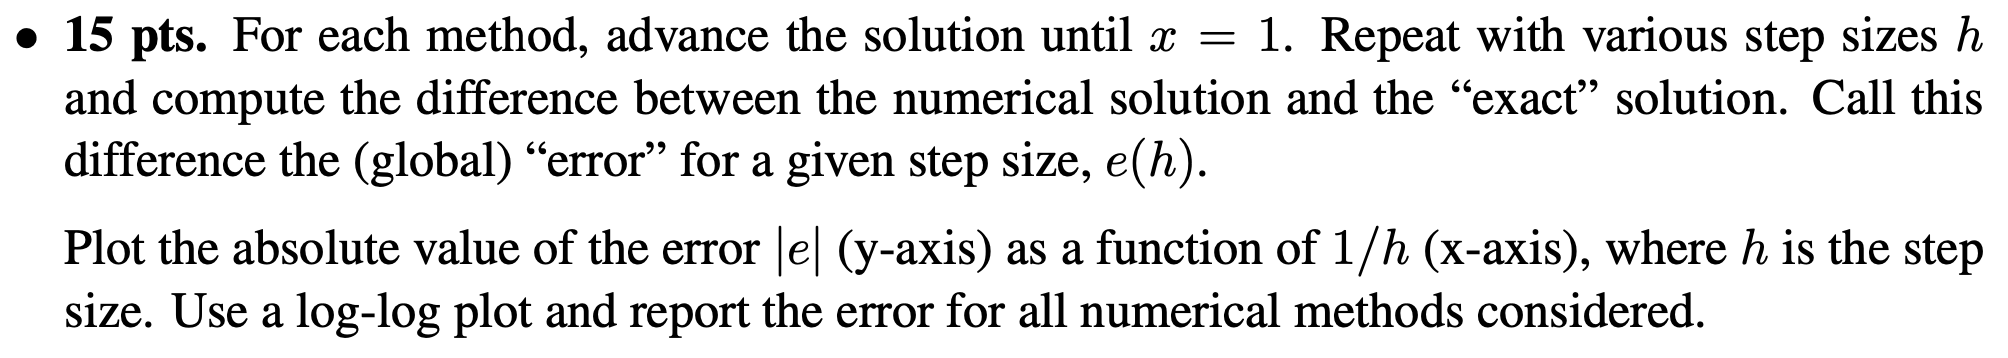


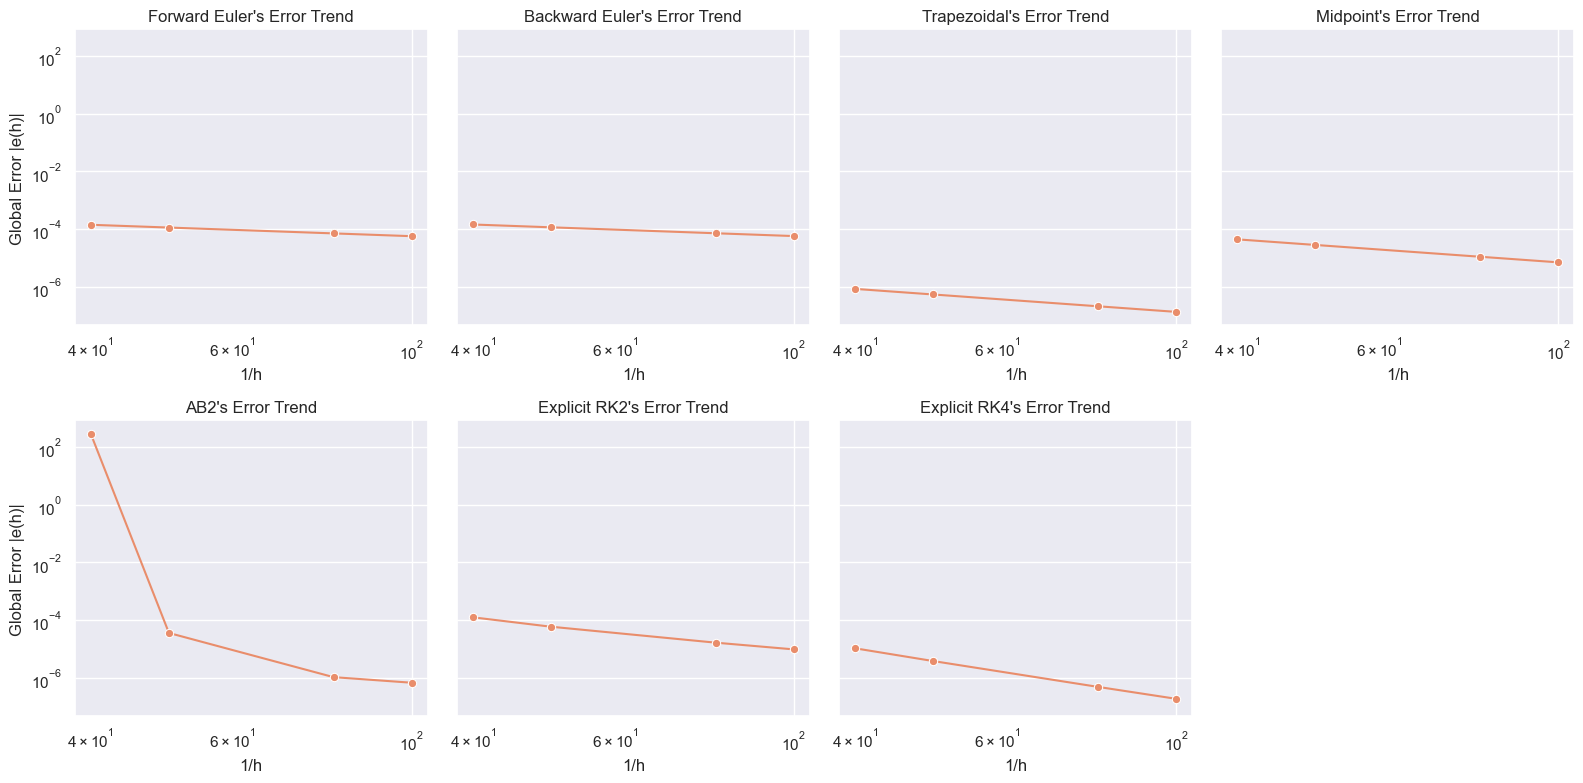

In [134]:
# Define the figure and axes for a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)  # 2 rows, 4 columns
# Loop over each subplot (2x4 grid)
for i, ax in enumerate(axes.flat[0:-1]):  # Flatten axes for easy iteration
    sns.lineplot(x = 1 / varying_hs, y= methods_errors[i], marker = 'o', ax=ax) # pot using different step sizes
    # Set log-log scale
    ax.set_xscale("log"), ax.set_yscale("log")
    # Set plot labels and title
    ax.set_title(f"{titles[i]}'s Error Trend")
    ax.set_xlabel("1/h", fontsize = 12)
    ax.set_ylabel("Global Error |e(h)|", fontsize = 12)

# hide the last plot
axes[-1,-1].axis('off')
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

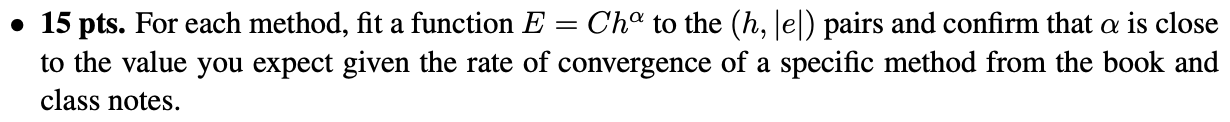

In [135]:
from scipy.stats import linregress

expected_orders = [1, 1, 2, 2, 2, 2, 4]  # Expected theoretical orders for each method

for i, method_error in enumerate(methods_errors):
    log_h = np.log(varying_hs)   # log(h)
    log_error = np.log(method_error)  # log(|e(h)|)
    
    slope = linregress(log_h, log_error)[0]
    print(f"{titles[i]}: Estimated α ≈ {slope:.2f}, Expected α = {expected_orders[i]}")


Forward Euler: Estimated α ≈ 0.99, Expected α = 1
Backward Euler: Estimated α ≈ 1.01, Expected α = 1
Trapezoidal: Estimated α ≈ 2.00, Expected α = 2
Midpoint: Estimated α ≈ 2.00, Expected α = 2
AB2: Estimated α ≈ 18.71, Expected α = 2
Explicit RK2: Estimated α ≈ 2.77, Expected α = 2
Explicit RK4: Estimated α ≈ 4.39, Expected α = 4


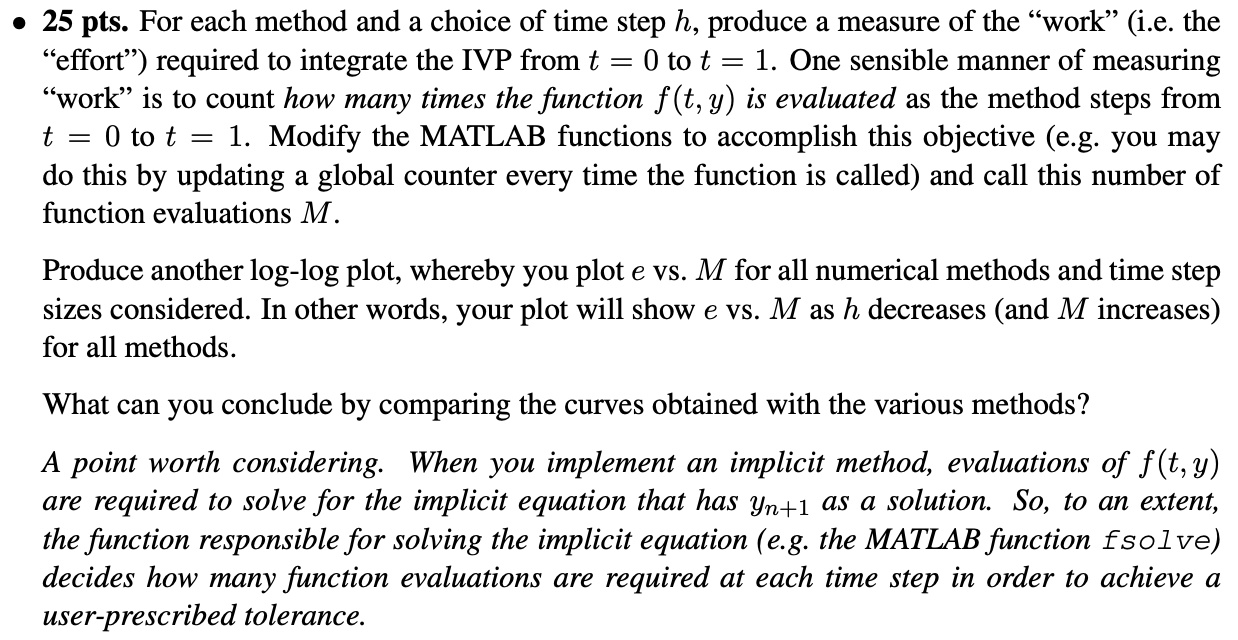

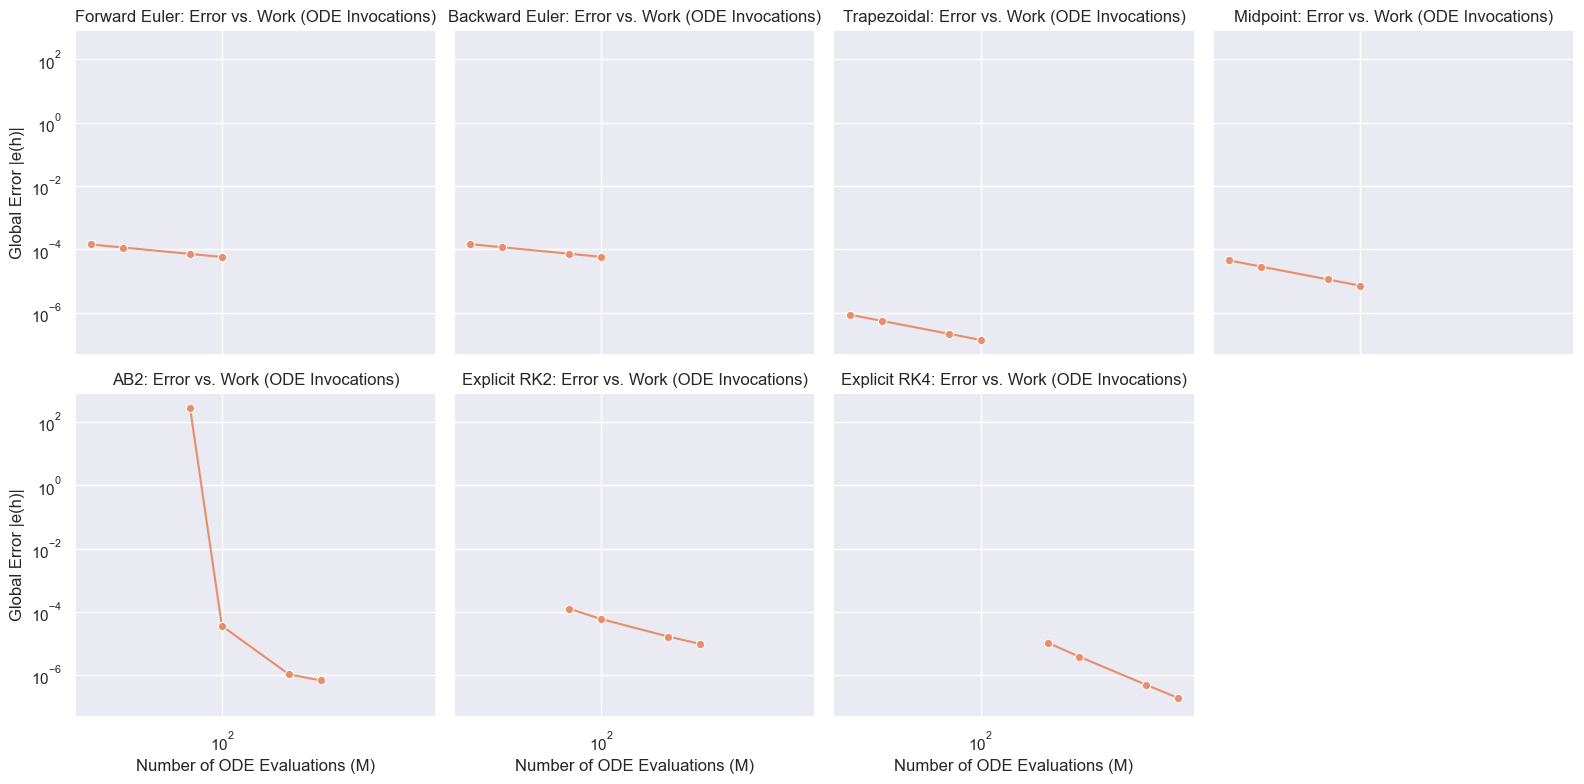

In [136]:
# Define the figure and axes for a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True, sharex=True)

# Loop over each subplot (2x4 grid)
for i, ax in enumerate(axes.flat[0:-1]):  # Flatten axes for easy iteration
    sns.lineplot(x=methods_work[i], y=methods_errors[i], marker='o', ax=ax)  # Corrected order

    # Set log-log scale
    ax.set_xscale("log")
    ax.set_yscale("log")

    # Set plot labels and title
    ax.set_title(f'{titles[i]}: Error vs. Work (ODE Invocations)')
    ax.set_xlabel("Number of ODE Evaluations (M)", fontsize=12)
    ax.set_ylabel("Global Error |e(h)|", fontsize=12)

# Hide the last empty plot
axes[-1, -1].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


By comparing the error vs. work curves for various numerical methods, we can observe significant differences in their efficiency and accuracy. Higher-order methods, such as Explicit RK4, exhibit the steepest decline in error as the number of function evaluations increases, confirming their superior accuracy per computational effort. In contrast, Forward and Backward Euler methods demonstrate a much slower reduction in error, requiring significantly more function evaluations to achieve comparable accuracy, making them computationally inefficient for high-precision applications.

Second-order methods, including the Trapezoidal, Midpoint, and Explicit RK2 methods, strike a balance between accuracy and computational cost. They outperform the Euler methods while requiring fewer evaluations than RK4, making them an attractive option when moderate accuracy is sufficient. The Adams-Bashforth 2 (AB2) method initially exhibits instability at larger step sizes, but its performance improves as the step size decreases, indicating that multistep methods may require careful handling of initial values.

Explicit RK4 stands out as the most efficient method for achieving high accuracy with a reasonable number of function evaluations. However, it requires four function calls per step, making it computationally expensive compared to second-order methods. In contrast, the Midpoint and Trapezoidal methods provide a good trade-off, offering significant accuracy improvements over Euler methods while keeping function evaluations manageable. Ultimately, the choice of numerical method depends on the trade-off between computational cost and accuracy required for the given problem.

## Question 2
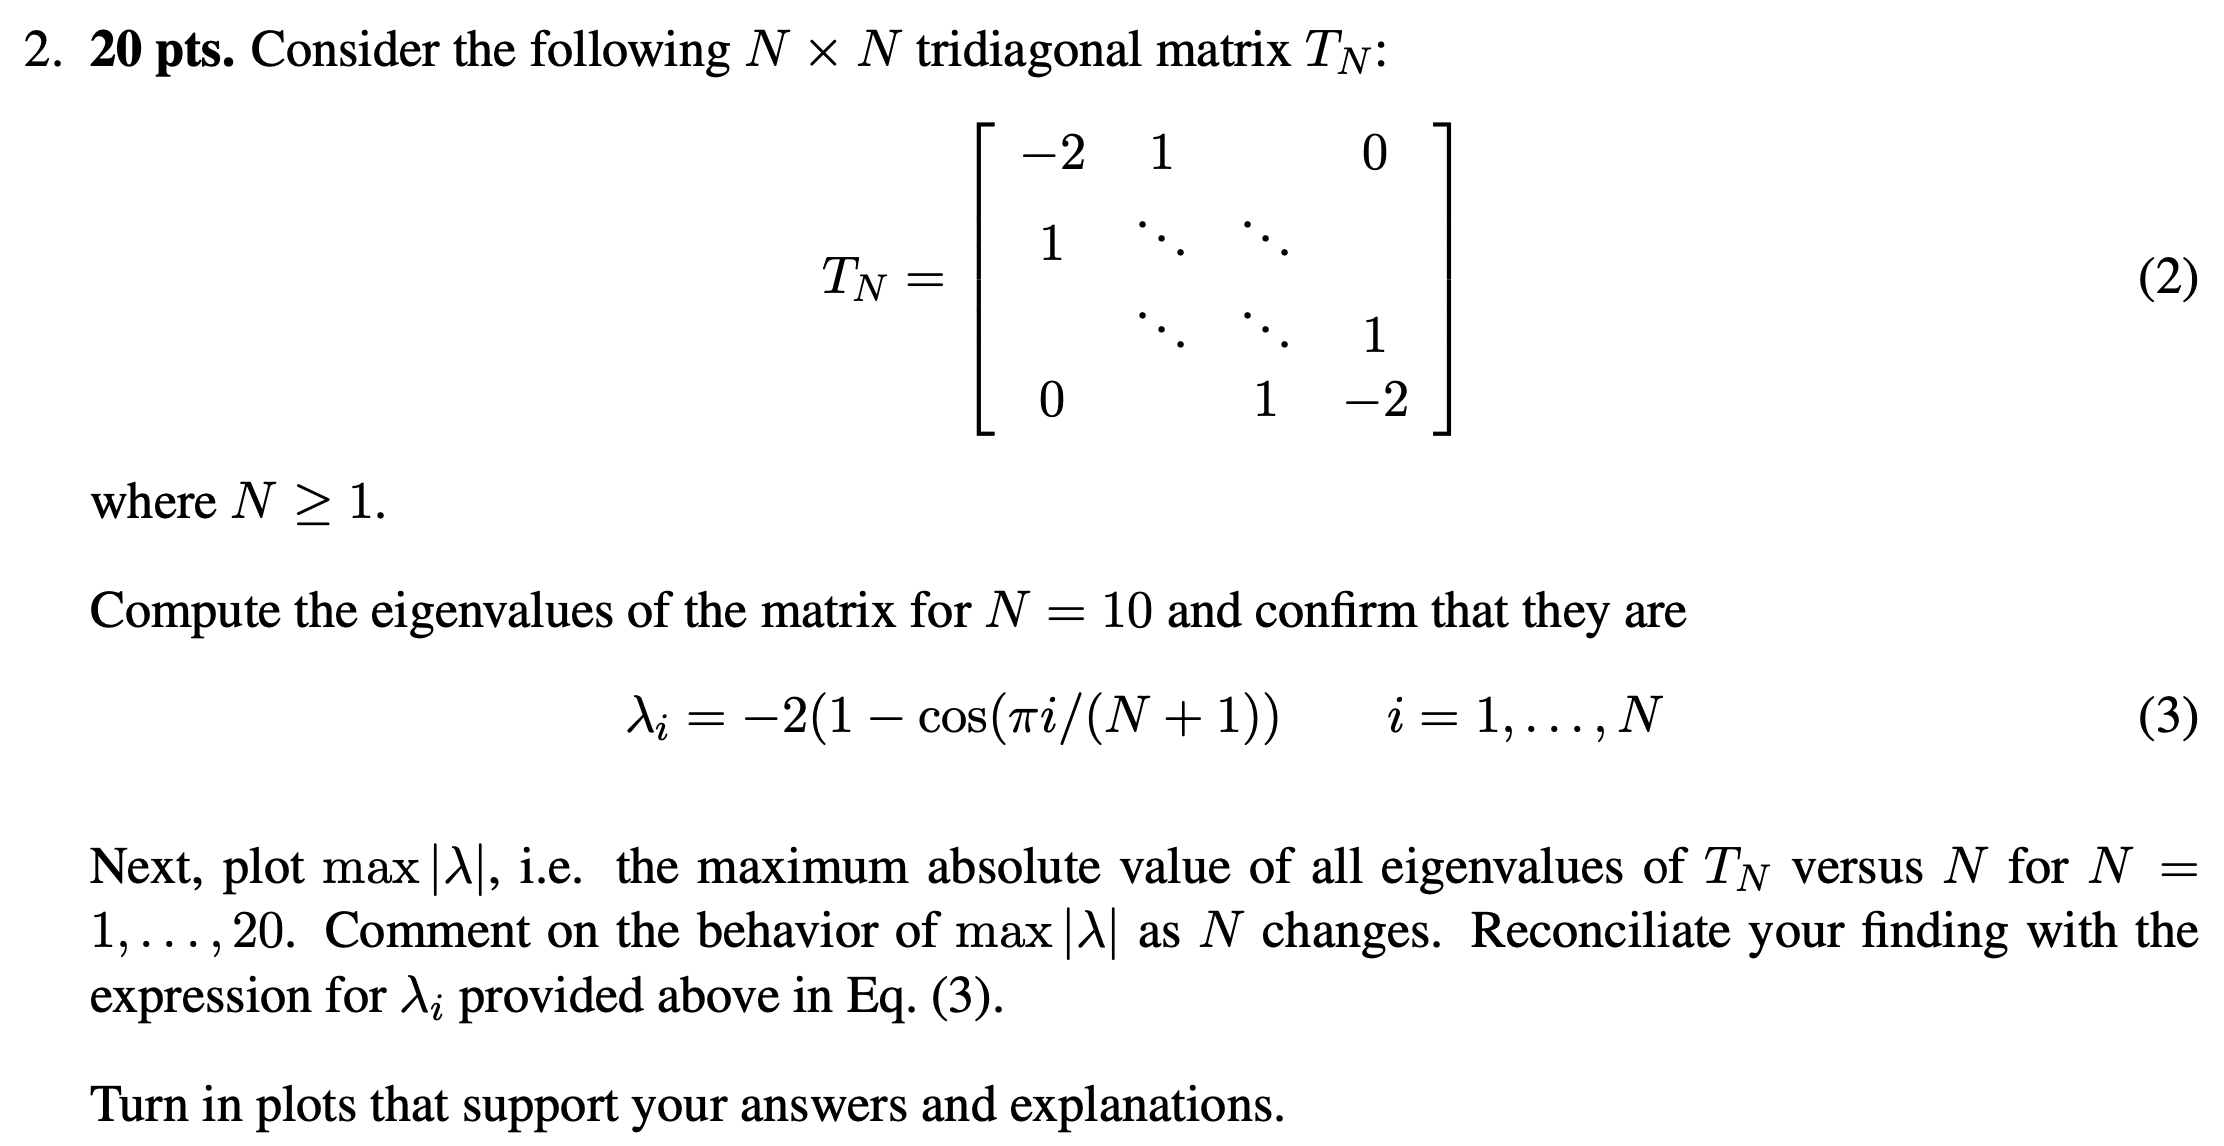

### Tridiagonal Matrix Function and Analytical Eigenvalue Function

In [137]:
def make_tridiagonal_matrix(N: int) -> np.array:
    """
    Constructs the N x N tridiagonal matrix T_N.

    Parameters:
    N (int): Size of the matrix

    Returns:
    numpy.ndarray: The tridiagonal matrix T_N
    """
    main_diag = -2 * np.ones(N)       # Main diagonal (-2)
    off_diag = np.ones(N - 1)         # Off diagonals (1)
    # Construct the tridiagonal matrix
    return np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

def compute_eigvals_TN(N):
    """Compute the eigenvalues of the tridiagonal matrix T_N using equation (3)"""
    i_values = np.arange(1, N + 1)  # Vector of indices i = [1, 2, ..., N]
    return -2 * (1 - np.cos(np.pi * i_values / (N + 1)))  # Fully vectorized operation

#### Compute Eigenvalues for N = 10 and Confirm If they match the above definition (3).
Our results below confirms that both produce same eigenvalues!

In [138]:
# compute eigenvalues of T_N of N = 10
eigen_vals_N10 = np.sort(np.linalg.eig(make_tridiagonal_matrix(10))[0])
# Then compute per (3)
eigen_vals_by_3 = np.sort(compute_eigvals_TN(10))

print(f"Eigen Values (sorted) of the T_N Matrix :")
print(eigen_vals_N10.T)
print(f"Eigven Values (sorted) using the equation 3 : ")
print(eigen_vals_by_3.T)
print("The difference between thsoe two:")
print(np.round(eigen_vals_by_3-eigen_vals_N10,4))

Eigen Values (sorted) of the T_N Matrix :
[-3.91898595 -3.68250707 -3.30972147 -2.83083003 -2.28462968 -1.71537032
 -1.16916997 -0.69027853 -0.31749293 -0.08101405]
Eigven Values (sorted) using the equation 3 : 
[-3.91898595 -3.68250707 -3.30972147 -2.83083003 -2.28462968 -1.71537032
 -1.16916997 -0.69027853 -0.31749293 -0.08101405]
The difference between thsoe two:
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. -0.]


#### Plot $max|λ|$ for $N = 1, . . . , 20$

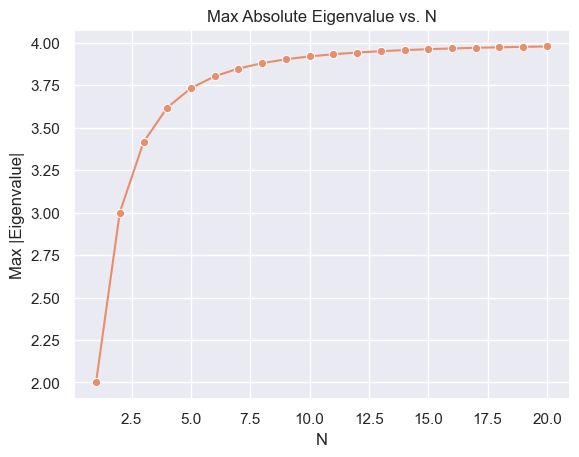

In [139]:
# Store max eigenvalues for N from 1 to 10
max_eigen_vals = np.zeros(20)  # Corrected size to match 10 iterations
iterations_N = np.arange(1, 21)

# Iterate over N = 1 to 10
for n in range(1, 20+1):
    max_eigen_vals[n-1] = np.max(np.abs(compute_eigvals_TN(n)))  # Adjust index by subtracting 1

# Plot using seaborn
sns.lineplot(x=iterations_N, y=max_eigen_vals, marker='o')
plt.xlabel("N")
plt.ylabel("Max |Eigenvalue|")
plt.title("Max Absolute Eigenvalue vs. N")
plt.grid(True)
plt.show()

##### Behavior of $\max |\lambda|$ as $N$ Changes
The plot shows that the maximum absolute eigenvalue, $\max |\lambda|$, **increases with $N$** but approaches a limiting value. Specifically:
- For small $N$, the eigenvalues grow **rapidly**.
- For larger $N$, the growth slows down and asymptotically approaches **4**.

This suggests that the largest eigenvalue converges as $N \to \infty$, meaning the system has a well-defined spectral bound.

##### Reconciliation with the Given Formula

From the given formula:

$$
\lambda_i = -2(1 - \cos(\pi i / (N+1)))
$$

the maximum eigenvalue occurs at $i = N$, giving:

$$
\lambda_{\max} = -2(1 - \cos(\pi N / (N+1)))
$$

For large $N$, we approximate:

$$
\cos\left(\frac{\pi N}{N+1}\right) \to -1
$$

Thus, the eigenvalue simplifies to:

$$
\lambda_{\max} \approx -2(1 - (-1)) = -4
$$

Since we are taking **absolute values**, we get:

$$
\max |\lambda_{max}| \to 4
$$

which matches the **asymptotic behavior observed in the plot**.